# Intermediate Python

In this unit we will be looking into 4 topics:

- Visualisation with Matplotlib
- Dictionaries and Pandas
- Control Flow and Filtering
- Loops


### Matplotlib visualisation

We will be working with the gapminder dataset for this chapter. I have installed it from pip where the author has kindly packaged this data for us.

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from gapminder import gapminder
import pandas as pd

In [7]:
# Creating some dummy data
a = np.linspace(10, 35, 10)
b = np.arange(1950,  2050, 10)`

Most basic matplotlib plot is the line plot, which can be drawn using the plt.plot() function.

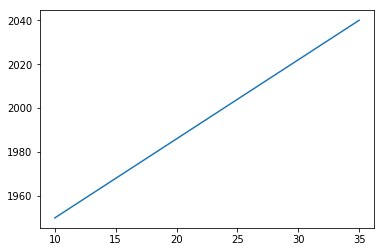

In [9]:
plt.plot(a, b)
plt.show()

In [2]:
gapminder.head()

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

In [29]:
a = gapminder[gapminder['country'] == 'Afghanistan'][['year', 'pop']]

<function matplotlib.pyplot.show(*args, **kw)>

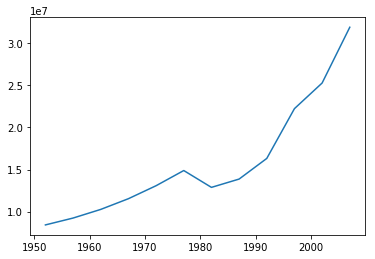

In [30]:
plt.plot(a['year'], a['pop'])
plt.show

Next we look at scatter plots which are useful to see if there is a correlation between variables. 

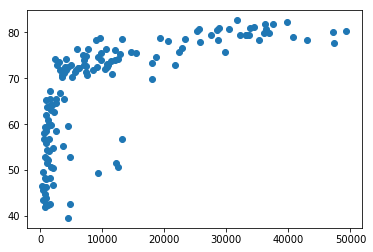

In [31]:
plt.scatter(gapminder[gapminder['year'] == 2007]['gdpPercap'], gapminder[gapminder['year'] == 2007]['lifeExp'] )

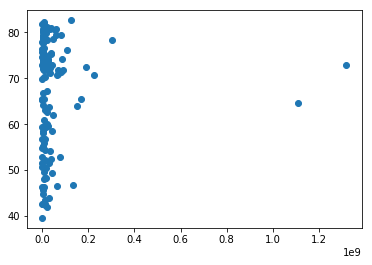

In [32]:
plt.scatter(gapminder[gapminder['year'] == 2007]['pop'], gapminder[gapminder['year'] == 2007]['lifeExp'] )

Nexr we look at histograms which are useful to show the distribution of a variable. 

(array([ 8.,  7., 10., 10., 10.,  8.,  5., 33., 23., 28.]),
 array([39.613, 43.912, 48.211, 52.51 , 56.809, 61.108, 65.407, 69.706,
        74.005, 78.304, 82.603]),
 <a list of 10 Patch objects>)

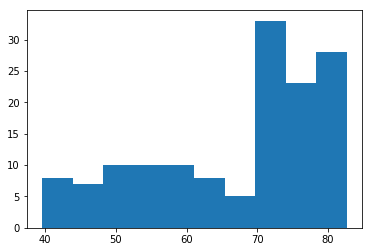

In [35]:
plt.hist(gapminder[gapminder['year'] == 2007]['lifeExp'])

The distribution of the variable lifeExp is not really clear from the defalt call to hist(). This is becuase python sets the number to 10. Too few bins oversimplify the picture and too many bins overcomplicate things. This number must be set by the scientist on a per plot basis.

(array([15., 20., 18., 38., 51.]),
 array([39.613, 48.211, 56.809, 65.407, 74.005, 82.603]),
 <a list of 5 Patch objects>)

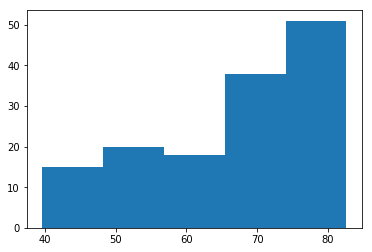

In [36]:
plt.hist(gapminder[gapminder['year'] == 2007]['lifeExp'], bins=5)

(array([ 1.,  7.,  2.,  5.,  4.,  6.,  5.,  5.,  4.,  6.,  3.,  5.,  5.,
         0., 12., 21., 13., 10., 17., 11.]),
 array([39.613 , 41.7625, 43.912 , 46.0615, 48.211 , 50.3605, 52.51  ,
        54.6595, 56.809 , 58.9585, 61.108 , 63.2575, 65.407 , 67.5565,
        69.706 , 71.8555, 74.005 , 76.1545, 78.304 , 80.4535, 82.603 ]),
 <a list of 20 Patch objects>)

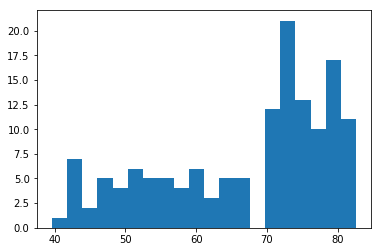

In [37]:
plt.hist(gapminder[gapminder['year'] == 2007]['lifeExp'], bins=20)

(array([ 3.,  6.,  6.,  7.,  6.,  7.,  7.,  4.,  7.,  5.,  6., 27., 18.,
        17., 16.]),
 array([39.613, 42.479, 45.345, 48.211, 51.077, 53.943, 56.809, 59.675,
        62.541, 65.407, 68.273, 71.139, 74.005, 76.871, 79.737, 82.603]),
 <a list of 15 Patch objects>)

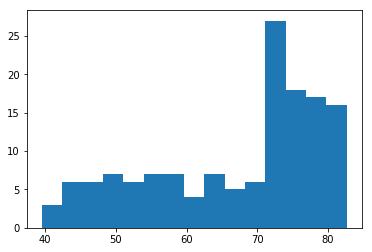

In [38]:
plt.hist(gapminder[gapminder['year'] == 2007]['lifeExp'], bins=15)

(array([ 5.,  8., 14., 17., 20., 11.,  7.,  7.,  4.,  7.,  9.,  6., 11.,
        11.,  5.]),
 array([28.801 , 31.7256, 34.6502, 37.5748, 40.4994, 43.424 , 46.3486,
        49.2732, 52.1978, 55.1224, 58.047 , 60.9716, 63.8962, 66.8208,
        69.7454, 72.67  ]),
 <a list of 15 Patch objects>)

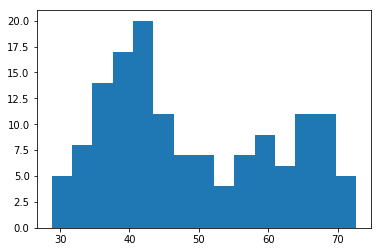

In [43]:
plt.hist(gapminder[gapminder['year'] == 1952]['lifeExp'], bins=15)


Next we look into plot customisation:

- adding labels to axes
- adding titles to plot
- adding ticks
- changing size of points
- adding colors
- add grid
- add text

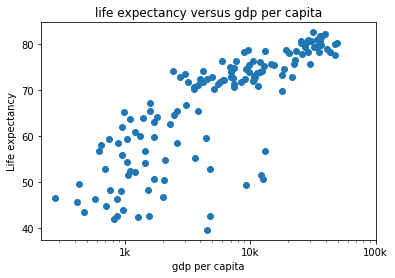

In [46]:
plt.scatter(gapminder[gapminder['year'] == 2007]['gdpPercap'], gapminder[gapminder['year'] == 2007]['lifeExp'] )
plt.xscale('log')
plt.xlabel('gdp per capita')
plt.ylabel('Life expectancy')
plt.title('life expectancy versus gdp per capita')
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)
plt.show()

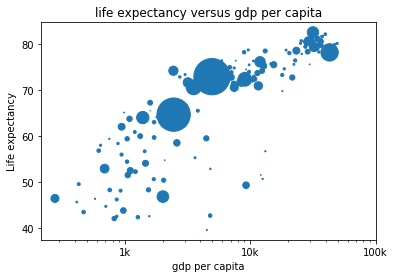

In [48]:
plt.scatter(gapminder[gapminder['year'] == 2007]['gdpPercap'], gapminder[gapminder['year'] == 2007]['lifeExp'] , 
            s= gapminder[gapminder['year'] == 2007]['pop']/1e+6 )
plt.xscale('log')
plt.xlabel('gdp per capita')
plt.ylabel('Life expectancy')
plt.title('life expectancy versus gdp per capita')
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)
plt.show()

In [49]:
temp_color= dict = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'yellow',
    'Oceania':'black'
}

In [61]:
color_list = []

for country in gapminder.country.unique():
    color_list.append(dict[gapminder[gapminder['country'] == country].continent.unique()[0]])

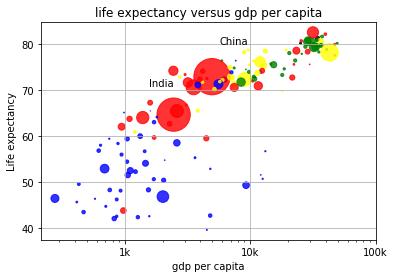

In [64]:
plt.scatter(gapminder[gapminder['year'] == 2007]['gdpPercap'], gapminder[gapminder['year'] == 2007]['lifeExp'] , 
            s= gapminder[gapminder['year'] == 2007]['pop']/1e+6, c=color_list, alpha=0.8 )
plt.xscale('log')
plt.xlabel('gdp per capita')
plt.ylabel('Life expectancy')
plt.title('life expectancy versus gdp per capita')
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)
plt.grid()
plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')
plt.show()

### Dictionaries

Now we look at second of the python built in data structures, namely dictionaries. They are named collection of values.

In [65]:
countries = ['spain', 'france', 'germany', 'norway']
capitals = ['madrid', 'paris', 'berlin', 'oslo']

# From string in countries and capitals, create dictionary europe
europe = {
    countries[0] : capitals[0],
    countries[1] : capitals[1],
    countries[2] : capitals[2],
    countries[3] : capitals[3]
}


# Print europe
print(europe)

{'spain': 'madrid', 'france': 'paris', 'germany': 'berlin', 'norway': 'oslo'}


Dictionaries have methods keys(), values() and items() which let us access the keys, values and key,value pairs respectively for access to the items. 

In [67]:
print(europe.keys())
# Print out value that belongs to key 'norway'
print(europe['norway'])

dict_keys(['spain', 'france', 'germany', 'norway'])
oslo


Adding items is easy: simply add the key and value as dictionary['key'] = 'value'. 
Manipulating items is done in the same way : dictionary['key'] = 'new_value'.
Removing items from dictionaries can be done using the pop() method (this will print the value corresponding to the pair which is being removed).


In [68]:
europe['italy']  = 'rome'
print('italy' in europe)
europe['poland'] = 'warsaw'
print(europe)

True
{'spain': 'madrid', 'france': 'paris', 'germany': 'berlin', 'norway': 'oslo', 'italy': 'rome', 'poland': 'warsaw'}


In [69]:
europe_wrong = {'spain':'madrid', 'france':'paris', 'germany':'bonn',
          'norway':'oslo', 'italy':'rome', 'poland':'warsaw',
          'australia':'vienna' }
europe_wrong['germany'] = 'berlin'
europe_wrong.pop('australia')

'vienna'

Since values inside dictionaries can be anything, they can in turn also be dictionaries. As an example:

In [71]:
# Dictionary of dictionaries
europe_new = { 'spain': { 'capital':'madrid', 'population':46.77 },
           'france': { 'capital':'paris', 'population':66.03 },
           'germany': { 'capital':'berlin', 'population':80.62 },
           'norway': { 'capital':'oslo', 'population':5.084 } }
print(europe_new['france']['capital'])
data =  {'capital' : 'rome',
    'population' : 59.83
}
europe_new['italy'] = data
print(europe_new)

paris
{'spain': {'capital': 'madrid', 'population': 46.77}, 'france': {'capital': 'paris', 'population': 66.03}, 'germany': {'capital': 'berlin', 'population': 80.62}, 'norway': {'capital': 'oslo', 'population': 5.084}, 'italy': {'capital': 'rome', 'population': 59.83}}


### Pandas

Python package which provides datastructures which make data analysis easier. The two main structures it provides are Series and Dataframe. 
A dataframe is a table with row and column indexes.
A series is essentially a numpy array with indexes.

In [73]:
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]
my_dict = {
    'country' : names,
    'drives_right' : dr,
    'cars_per_cap' : cpc
    
}
cars = pd.DataFrame(my_dict)
print(cars)

         country  drives_right  cars_per_cap
0  United States          True           809
1      Australia         False           731
2          Japan         False           588
3          India         False            18
4         Russia          True           200
5        Morocco          True            70
6          Egypt          True            45


In [74]:
row_labels = ['US', 'AUS', 'JAP', 'IN', 'RU', 'MOR', 'EG']
cars.index = row_labels
print(cars)


           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JAP          Japan         False           588
IN           India         False            18
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


Data can also be read into a dataframe from a csv file using the pandas read_csv method.

Indexing data can be done in different ways. A simle way is to use the sqaure bracket notation: df[]. A single [] returns a pandas series while a double [[]] returns a DataFrame.

In [75]:
print(cars['country'])
print(cars[['country']])
print(cars[['country', 'drives_right']])

US     United States
AUS        Australia
JAP            Japan
IN             India
RU            Russia
MOR          Morocco
EG             Egypt
Name: country, dtype: object
           country
US   United States
AUS      Australia
JAP          Japan
IN           India
RU          Russia
MOR        Morocco
EG           Egypt
           country  drives_right
US   United States          True
AUS      Australia         False
JAP          Japan         False
IN           India         False
RU          Russia          True
MOR        Morocco          True
EG           Egypt          True


Using the [] notation, subsets of the data can be obtained.

_Note: Only rows can be obtained using [:] if a slice is provided. Also integer index will be used not label_

In [76]:
print(cars[0:3])
print(cars[3:6])

           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JAP          Japan         False           588
     country  drives_right  cars_per_cap
IN     India         False            18
RU    Russia          True           200
MOR  Morocco          True            70


Next we look at .loc and .iloc methods. 
These are more powerful methods for indexing data from DataFrames. These are more powerful indexing methods over the [] operator.

loc is label based.
iloc is index based.

They let you select, rows, columns or both rows and columns. Making them extremely powerful. Almost any indexing operation is possible using the right formula using these methods.

In [77]:
print(cars.loc['JAP'])
print(cars.loc[['AUS', 'EG']])

country         Japan
drives_right    False
cars_per_cap      588
Name: JAP, dtype: object
       country  drives_right  cars_per_cap
AUS  Australia         False           731
EG       Egypt          True            45


In [78]:
print(cars.loc['MOR', 'drives_right'])
print(cars.loc[['RU', 'MOR'], ['country', 'drives_right']])

True
     country  drives_right
RU    Russia          True
MOR  Morocco          True


In [79]:
print(cars.loc[:, 'drives_right'])
print(cars.loc[:, ['drives_right']])
print(cars.loc[:, ['cars_per_cap', 'drives_right']])

US      True
AUS    False
JAP    False
IN     False
RU      True
MOR     True
EG      True
Name: drives_right, dtype: bool
     drives_right
US           True
AUS         False
JAP         False
IN          False
RU           True
MOR          True
EG           True
     cars_per_cap  drives_right
US            809          True
AUS           731         False
JAP           588         False
IN             18         False
RU            200          True
MOR            70          True
EG             45          True


### Logic , Control Flow and Filtering

Checking for equality, inequality
- Equality/inequality: == / !=
- greater than/less than: >/< also >=/<=

In [81]:
print(True ==  False)
print(-5 * 15 != 75)
print("pyscript" == "PyScript")
print(True == 1)

False
True
False
True


In [82]:
x = -3 * 6
print(x >= -10)
y = "test"
print("test" <= y)
print(True > False)

False
True
True


In [83]:
my_house = np.array([18.0, 20.0, 10.75, 9.50])
your_house = np.array([14.0, 24.0, 14.25, 9.0])
print(my_house >= 18)
print(my_house < your_house)

[ True  True False False]
[False  True  True False]


Boolean operatos

- and/or/not
- boolean operators don't work with arrays. Use np.logica_and, np.logical_or or np.logical_not

In [84]:
my_kitchen = 18.0
your_kitchen = 14.0
print( my_kitchen > 10 and my_kitchen < 18)
print ( my_kitchen < 14 or my_kitchen > 17)
print (2*my_kitchen < 3*your_kitchen)

False
True
True


In [85]:
my_house = np.array([18.0, 20.0, 10.75, 9.50])
your_house = np.array([14.0, 24.0, 14.25, 9.0])
print(np.logical_or(my_house >18.5, my_house < 10))
print(np.logical_and(my_house < 11, your_house < 11))

[False  True False  True]
[False False False  True]


Now we look at conditionals: if/elif/else

In [86]:
room = "kit"
area = 14.0
if room == "kit" :
    print("looking around in the kitchen.")
if area > 15:
    print("big place!")

looking around in the kitchen.


In [87]:
room = "kit"
area = 14.0
if room == "kit" :
    print("looking around in the kitchen.")
else :
    print("looking around elsewhere.")
if area > 15 :
    print("big place!")
else:
    print("pretty small.")

looking around in the kitchen.
pretty small.


In [88]:
room = "bed"
area = 14.0

if room == "kit" :
    print("looking around in the kitchen.")
elif room == "bed":
    print("looking around in the bedroom.")
else :
    print("looking around elsewhere.")

if area > 15 :
    print("big place!")
elif area > 10:
    print("medium size, nice!")
else :
    print("pretty small.")

looking around in the bedroom.
medium size, nice!


#### Filtering Dataframes:

In [89]:
dr = cars['drives_right']
sel = cars[dr]
print(sel)

           country  drives_right  cars_per_cap
US   United States          True           809
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


In [90]:
sel = cars[cars['drives_right']]
print(sel)

           country  drives_right  cars_per_cap
US   United States          True           809
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


In [91]:
cpc = cars['cars_per_cap']
between = np.logical_and(cpc >100, cpc < 500)
medium = cars[between]
print(medium)

   country  drives_right  cars_per_cap
RU  Russia          True           200


Now we look at loops:
- while
- for

In [93]:
offset = 8
while offset != 0:
    #print("correcting...")
    offset -= 1
    print(offset)

7
6
5
4
3
2
1
0


In [95]:
offset = -6
while offset != 0 :
    if offset > 0:
        offset = offset - 1
    else:
        offset += 1
    print(offset)

-5
-4
-3
-2
-1
0


In [96]:
areas = [11.25, 18.0, 20.0, 10.75, 9.50]
for area in areas:
    print(area)

11.25
18.0
20.0
10.75
9.5


In [97]:
areas = [11.25, 18.0, 20.0, 10.75, 9.50]
for i,a in enumerate(areas) :
    print("room " + str(i) + ": "+str(a))

room 0: 11.25
room 1: 18.0
room 2: 20.0
room 3: 10.75
room 4: 9.5


In [98]:
areas = [11.25, 18.0, 20.0, 10.75, 9.50]
for index, area in enumerate(areas) :
    print("room " + str(index + 1) + ": " + str(area))

room 1: 11.25
room 2: 18.0
room 3: 20.0
room 4: 10.75
room 5: 9.5


In [99]:
house = [["hallway", 11.25], 
         ["kitchen", 18.0], 
         ["living room", 20.0], 
         ["bedroom", 10.75], 
         ["bathroom", 9.50]]
for h in house:
    print("the " + str(h[0]) +  " is " + str(h[1]) + " sqm"  )

the hallway is 11.25 sqm
the kitchen is 18.0 sqm
the living room is 20.0 sqm
the bedroom is 10.75 sqm
the bathroom is 9.5 sqm


In [100]:
europe = {'spain':'madrid', 'france':'paris', 'germany':'berlin',
          'norway':'oslo', 'italy':'rome', 'poland':'warsaw', 'austria':'vienna' }          
for key, value in europe.items():
    print ("the capital of " + key +  " is " + value) 

the capital of spain is madrid
the capital of france is paris
the capital of germany is berlin
the capital of norway is oslo
the capital of italy is rome
the capital of poland is warsaw
the capital of austria is vienna


Iterating over Arrays and DataFrames:

In [105]:
np_height = np.array([1,2,3,4,5,6,7])
np_baseball = np.array([[4,78,62,3,4,5,6,6],[1,3,4,6,3,2, 3, 9]])
for x in np_height:
    print(str(x) + " inches")

for x in np.nditer(np_baseball):
    print(x)

1 inches
2 inches
3 inches
4 inches
5 inches
6 inches
7 inches
4
78
62
3
4
5
6
6
1
3
4
6
3
2
3
9


In [106]:
for lab, row in cars.iterrows():
    print(lab)
    print(row)

US
country         United States
drives_right             True
cars_per_cap              809
Name: US, dtype: object
AUS
country         Australia
drives_right        False
cars_per_cap          731
Name: AUS, dtype: object
JAP
country         Japan
drives_right    False
cars_per_cap      588
Name: JAP, dtype: object
IN
country         India
drives_right    False
cars_per_cap       18
Name: IN, dtype: object
RU
country         Russia
drives_right      True
cars_per_cap       200
Name: RU, dtype: object
MOR
country         Morocco
drives_right       True
cars_per_cap         70
Name: MOR, dtype: object
EG
country         Egypt
drives_right     True
cars_per_cap       45
Name: EG, dtype: object


In [107]:
for lab, row in cars.iterrows() :
    print(lab + ": " + str(row['cars_per_cap']))


US: 809
AUS: 731
JAP: 588
IN: 18
RU: 200
MOR: 70
EG: 45


In [108]:
for lab, row in cars.iterrows():
    cars.loc[lab, "COUNTRY"] = row["country"].upper()

print(cars)

           country  drives_right  cars_per_cap        COUNTRY
US   United States          True           809  UNITED STATES
AUS      Australia         False           731      AUSTRALIA
JAP          Japan         False           588          JAPAN
IN           India         False            18          INDIA
RU          Russia          True           200         RUSSIA
MOR        Morocco          True            70        MOROCCO
EG           Egypt          True            45          EGYPT


The iterrows method is not efficient if a new column is needed to be created. Instead the apply method is better.

In [109]:
cars["COUNTRY"] = cars["country"].apply(str.upper)